In [2]:
import datetime
start_time = datetime.datetime.now(); print(start_time)

2018-07-16 02:24:17.987616


In [4]:
secret = False #Will be put to True for a CASD export

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }<\style>"))

In [6]:
import gc
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd ; pd.set_option("display.max_columns",200)
import pickle

In [7]:
store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/edp_2016_final.h5'
reaction_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/reaction.h5'
result_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/result.h5'
dads_by_year_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/dads_by_year.h5'
pickles_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/pickles/'
Store = pd.HDFStore(result_store_path)

In [9]:
print(Store.close())

None


In [8]:
# Store.close()
# fisc_revdet = pd.read_hdf( store_path,"FISC_REVDET_2012")
# fisc_revenu = pd.read_hdf(store_path,"FISC_REVENU_2012").sort_values("ID_FISC_LOG_DIFF")
# fisc_individu = pd.read_hdf( store_path,"FISC_INDIVIDU_2012" ).sort_values("ID_FISC_LOG_DIFF")

In [9]:
df_2011 = pd.read_hdf(result_store_path, "step_4")

In [12]:
df_2011_step_2 =  pd.read_hdf(result_store_path, "step_2")

In [17]:
df_2011 = pd.merge(df_2011, df_2011_step_2[
    list(set(df_2011_step_2.columns)-set(df_2011.columns)) + ["ID_FISC_LOG_DIFF"]], on = "ID_FISC_LOG_DIFF")


In [10]:
df_2014 = pd.read_hdf(result_store_path, "step_4_2015")
df_2014_step_2 =  pd.read_hdf(result_store_path, "step_2_2015")
df_2014 = pd.merge(df_2014, df_2014_step_2[
    list(set(df_2014_step_2.columns)-set(df_2014.columns)) + ["ID_FISC_LOG_DIFF"]], on = "ID_FISC_LOG_DIFF")

In [11]:
df_2014.shape

(1953790, 270)

couple_mar_pac_child_ss_maj          173832
concubin_with_or_without_children     95646
couple_child_detached_or_attached     79290
couple_mar_pac_ss_enf                 68261
celib_ss_enf                          57516
couple_mar_pac_child_maj_ratach       48101
celib_with_detached_child             24773
celib_ac_enf_ss_maj                   11581
Name: Type_menage2011, dtype: int64

In [19]:
merge_final = pd.merge(df_2011, df_2014, on = "ID_FISC_LOG_DIFF", suffixes = {"_2011", "_2014"})

In [37]:
merge_final_select = merge_final.query("(200000>YSALI2011>50000)")

In [ ]:
merge_final_select.value_counts()

In [41]:
merge_final_select_same_NBPAC = merge_final_select[merge_final_select.NBPAC2011 ==  merge_final_select.NBPAC2014]

In [43]:
merge_final_select_same_NBPAC.query("(Type_menage2011 == 'couple_mar_pac_child_ss_maj')").NBPAC2014.value_counts()

2.0    28663
1.0    10665
3.0     9332
4.0     1106
5.0      136
6.0       24
Name: NBPAC2014, dtype: int64

In [ ]:
merge_final_select_same_NBPAC.query("(Type_menage2011 == 'couple_mar_pac_child_ss_maj')").NBPAC2014.value_counts()

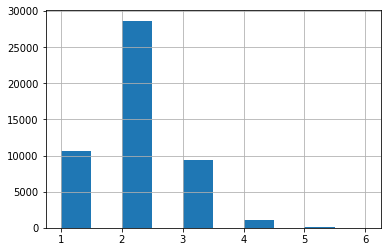

In [34]:
plt.show()

In [ ]:
merge_final.query("200000>YSALI2011>50000")[merge_final.Type_menage2011 == "couple_mar_pac_child_ss_maj"]

In [10]:
fisc_individu = pd.read_hdf( store_path,"FISC_INDIVIDU_2012" )

In [11]:
df_step_3 = pd.read_hdf(result_store_path, "step_3")

In [12]:
df_step_3.ID_FISC_LOG_DIFF.head(1)

0    2
Name: ID_FISC_LOG_DIFF, dtype: object

In [13]:
df_dads_columns = df_dads.columns
dads_columns = ["DADS_"+ col_name for col_name in df_dads_columns] 
df_dads.columns = ["DADS_"+ col_name for col_name in df_dads_columns] #Rename columns such that each column name has the DADS name in it

In [14]:
fisci_sexe_id_diff = fisc_individu[["ID_DIFF", "SEXE", 'ID_FISC_LOG_DIFF']].dropna(axis = 0)

In [16]:
import gc
del fisc_individu; gc.collect()

NameError: name 'fisc_individu' is not defined

In [15]:
merge = pd.merge(df_dads , fisci_sexe_id_diff, left_on= 'DADS_ID_DIFF', right_on="ID_DIFF")

In [16]:
dads_columns_pere = ["DADS_"+ col_name+"_pere" for col_name in df_dads_columns] #Rename columns such that each column name has the DADS name in it
dads_columns_mere = ["DADS_"+ col_name+"_mere" for col_name in df_dads_columns] #Rename columns such that each column name has the DADS name in it

In [17]:
for col in dads_columns:
    merge.loc[merge.SEXE == 1, (col+"_pere")] =  merge[col]
    merge.loc[merge.SEXE == 2, (col+"_mere")] =  merge[col]

In [ ]:
merge.head(5)

In [23]:
merge_2 = pd.merge(df_step_3, merge, left_on = "ID_FISC_LOG_DIFF", right_on = "ID_FISC_LOG_DIFF")

In [35]:
#merge.loc[merge.SEXE == 1, dads_columns_pere] = merge.where(merge.SEXE == 1)[dads_columns]

In [25]:
merge_2.to_hdf(result_store_path, "step_4")

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['ID_FISC_LOG_DIFF', 'DEP_x', 'DEPCOM', 'I_CHAMPM', 'I_PAUVRE50M', 'I_PAUVRE60M', 'DEP_y', 'SECCAD', 'OCC', 'DNATLC', 'NATLOC', 'TAX', 'NLOC4', 'EAU', 'EGOUT', 'ELEC', 'GAZ', 'CHAUFF', 'ASCENSEUR', 'DADS_ID_DIFF', 'DADS_DEPR', 'DADS_COMR', 'DADS_DEPT', 'DADS_COMT', 'DADS_CONTRAT_TRAVAIL', 'DADS_CS1', 'DADS_CS2', 'DADS_PCS4', 'DADS_CAT', 'DADS_CE', 'DADS_A38', 'DADS_APE40', 'DADS_NES5', 'DADS_ID_DIFF_pere', 'DADS_ID_DIFF_mere', 'DADS_DEPR_pere', 'DADS_DEPR_mere', 'DADS_COMR_pere', 'DADS_COMR_mere', 'DADS_DEPT_pere', 'DADS_DEPT_mere', 'DADS_COMT_pere', 'DADS_COMT_mere', 'DADS_CONTRAT_TRAVAIL_pere', 'DADS_CONTRAT_TRAVAIL_mere', 'DADS_CS1_pere', 'DADS_CS1_mere', 'DADS_CS2_pere', 'DADS

In [26]:
stop_time = datetime.datetime.now(); print("now: ",stop_time);
execution_time = stop_time - start_time; print("execution_time: ",execution_time)

now:  2018-07-13 19:46:37.610956
execution_time:  0:21:59.758137
